<a href="https://colab.research.google.com/github/SriramExpert/Smart-Waste-AI/blob/main/Google_colab/Smart_Waste_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚀 Overview**
This notebook provides an end-to-end pipeline for training/fine-tuning and inferencing with a YOLO-based object detection model. Key features:

      ✔ Load my custom datasets in YOLO format

      ✔ Train/fine-tune a model (optional)

      ✔ Run inference on images/videos

      ✔ Visualize results


# **📂 Dataset Structure (YOLO Format)**

        dataset/  
        ├── images/          # Training images (.jpg, .png)  
        │   ├── train/  
        │   └── val/  
        └── labels/          # YOLO annotation files (.txt)  
            ├── train/  
            └── val/  

**Step 1:** MOUNT YOUR GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2:** VERIFY YOUR RUNTIME ENVIRONMENT

      Go to Edit -> Notebook settings -> T4(GPU)

In [ ]:
!nvidia-smi

Fri Jul 18 13:23:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 3:** Create the folder in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Create the folder (if it doesn't exist)
!mkdir -p "/content/drive/MyDrive/Smart-Waste-AI"

print("Folder created: /content/drive/MyDrive/Smart-Waste-AI")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder created: /content/drive/MyDrive/Smart-Waste-AI


**Step 4:** Clone my Repository for images and labels

place the images and label in Smart-Waste-AI folder


**Step 5:** Place the images and label folder in created repository and verify the images and label folder exists in Garbage_detection_model

In [ ]:
import os

# Path to your Garbage_detection_model folder in Google Drive
target_dir = "/content/drive/MyDrive/Smart-Waste-AI"

# Check if directory exists
if not os.path.exists(target_dir):
    print(f"Error: Directory '{target_dir}' does not exist!")
else:
    print(f"Directory found: {target_dir}")

    # Verify images and labels folders
    required_folders = ['images', 'labels']
    missing_folders = [folder for folder in required_folders
                      if not os.path.exists(os.path.join(target_dir, folder))]

    if missing_folders:
        print(f"Missing folders: {', '.join(missing_folders)}")
    else:
        print("All required folders exist!")
        print("\nFolder contents:")
        for folder in required_folders:
            files = os.listdir(os.path.join(target_dir, folder))
            print(f"{folder}/: {len(files)} files")

Directory found: /content/drive/MyDrive/Smart-Waste-AI
All required folders exist!

Folder contents:
images/: 251 files
labels/: 251 files


# **Ok lets starts our Model**

**1. INSTALLATION**

In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

**2. Dataset Preparation – Train/Val/Test Split**



   This script organizes a custom YOLO dataset by splitting images and their corresponding labels into structured training (70%), validation (20%), and test (10%) sets. It automatically creates the necessary directory structure and ensures each image is matched with its correct annotation file. The randomized shuffling guarantees balanced data distribution across all splits for effective model training and evaluation.


In [ ]:
import os
import shutil
import random
from google.colab import drive



# Updated Paths for Google Drive
base_dir = "/content/drive/MyDrive/Smart-Waste-AI"
original_images = os.path.join(base_dir, "images")
original_labels = os.path.join(base_dir, "labels")
dataset_dir = base_dir

# Verify source folders exist
print("Verifying source directories...")
assert os.path.exists(original_images), f"Images folder not found at {original_images}"
assert os.path.exists(original_labels), f"Labels folder not found at {original_labels}"
print("✓ Source directories verified\n")

# Create train/val/test folders
print("Creating dataset structure...")
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(dataset_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, split, "labels"), exist_ok=True)
print("✓ Dataset structure created\n")

# Get and shuffle image files
image_files = [f for f in os.listdir(original_images) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_files)

# Split dataset (70-20-10)
total_files = len(image_files)
train_split = int(0.7 * total_files)
val_split = int(0.2 * total_files)

train_files = image_files[:train_split]
val_files = image_files[train_split:train_split + val_split]
test_files = image_files[train_split + val_split:]

def copy_files(files, split):
    """Helper function to copy files with verification"""
    for file in files:
        # Copy image
        img_src = os.path.join(original_images, file)
        img_dest = os.path.join(dataset_dir, split, "images", file)
        shutil.copy2(img_src, img_dest)

        # Copy corresponding label
        label_file = os.path.splitext(file)[0] + ".txt"
        label_src = os.path.join(original_labels, label_file)
        label_dest = os.path.join(dataset_dir, split, "labels", label_file)

        if not os.path.exists(label_src):
            print(f"⚠ Warning: Missing label for {file}")
        else:
            shutil.copy2(label_src, label_dest)

# Copy files to respective folders
print("Copying files...")
copy_files(train_files, "train")
copy_files(val_files, "val")
copy_files(test_files, "test")

# Final summary
print("\nDataset split complete:")
print(f"Total images: {total_files}")
print(f"Train set: {len(train_files)} images ({len(train_files)/total_files:.0%})")
print(f"Validation set: {len(val_files)} images ({len(val_files)/total_files:.0%})")
print(f"Test set: {len(test_files)} images ({len(test_files)/total_files:.0%})")

# Verification
print("\nVerifying destination files...")
for split in ["train", "val", "test"]:
    imgs = len(os.listdir(os.path.join(dataset_dir, split, "images")))
    lbls = len(os.listdir(os.path.join(dataset_dir, split, "labels")))
    print(f"{split.upper()}: {imgs} images, {lbls} labels ({'✓' if imgs==lbls else '⚠ Mismatch!'})")

Verifying source directories...
✓ Source directories verified

Creating dataset structure...
✓ Dataset structure created

Copying files...

Dataset split complete:
Total images: 251
Train set: 175 images (70%)
Validation set: 50 images (20%)
Test set: 26 images (10%)

Verifying destination files...
TRAIN: 175 images, 175 labels (✓)
VAL: 50 images, 50 labels (✓)
TEST: 26 images, 26 labels (✓)


**3. Dataset Validation & Cleaning**

    Verifies image-label pairs and handles mismatches to ensure dataset integrity.

In [ ]:
import os

def check_missing_labels(dataset_path):
    """Identifies images without corresponding label files in train/val/test splits"""
    for split in ["train", "val", "test"]:
        image_dir = os.path.join(dataset_path, split, "images")
        label_dir = os.path.join(dataset_path, split, "labels")

        # Get filenames without extensions
        images = set(os.path.splitext(f)[0] for f in os.listdir(image_dir))
        labels = set(os.path.splitext(f)[0] for f in os.listdir(label_dir))

        missing = images - labels
        print(f"{split.upper()}: {len(missing)} missing labels: {list(missing)[:5]}...")

check_missing_labels("/content/drive/MyDrive/Smart-Waste-AI")

TRAIN: 0 missing labels: []...
VAL: 0 missing labels: []...
TEST: 0 missing labels: []...


Note: If any mismatches in the above output..

          TRAIN: 3 missing labels: ['paper340_jpg.rf.90a0202', 'plastic12_jpg.rf.a1b2c3d', ...]
          VAL: 0 missing labels: []
          TEST: 1 missing labels: ['metal8_jpg.rf.x7y8z9']

Like this.. Run the below code

In [ ]:
import os

def remove_unpaired_files(dataset_path):
    """Deletes images without corresponding labels and vice versa"""
    for split in ["train", "val", "test"]:
        image_dir = os.path.join(dataset_path, split, "images")
        label_dir = os.path.join(dataset_path, split, "labels")

        # Get filename stems
        images = {os.path.splitext(f)[0] for f in os.listdir(image_dir)}
        labels = {os.path.splitext(f)[0] for f in os.listdir(label_dir)}

        # Remove unpaired images
        for missing in images - labels:
            img_path = os.path.join(image_dir, f"{missing}.jpg")
            os.remove(img_path)
            print(f"Removed unpaired image: {img_path}")

        # Remove unpaired labels
        for missing in labels - images:
            lbl_path = os.path.join(label_dir, f"{missing}.txt")
            os.remove(lbl_path)
            print(f"Removed unpaired label: {lbl_path}")

remove_unpaired_files("/content/drive/MyDrive/Smart-Waste-AI")

Complete the above step and

**Again Re-run the step 3**

**4. Dataset Structure Verification**

        Validates the existence of required image/label folders in all dataset splits

        Purpose
        This code checks whether your dataset is properly organized with the correct folder structure before training:

        Ensures images and labels subfolders exist in each split (train, val, test)

        Helps catch missing directories early to prevent training errors

# **📂 Dataset Structure (YOLO Format)**
              dataset/  
              ├── images/          # Training images (.jpg, .png)  
              │   ├── train/  
              │   └── val/  
              └── labels/          # YOLO annotation files (.txt)  
                  ├── train/  
                  └── val/  

In [ ]:
import os

splits = ["train", "val", "test"]
base_path = "/content/drive/MyDrive/Smart-Waste-AI"

for split in splits:
    img_dir = os.path.join(base_path, split, "images")
    label_dir = os.path.join(base_path, split, "labels")
    print(f"{split.upper()}:")
    print(f"  Images: {img_dir} exists? {os.path.exists(img_dir)}")
    print(f"  Labels: {label_dir} exists? {os.path.exists(label_dir)}")

TRAIN:
  Images: /content/drive/MyDrive/Smart-Waste-AI/train/images exists? True
  Labels: /content/drive/MyDrive/Smart-Waste-AI/train/labels exists? True
VAL:
  Images: /content/drive/MyDrive/Smart-Waste-AI/val/images exists? True
  Labels: /content/drive/MyDrive/Smart-Waste-AI/val/labels exists? True
TEST:
  Images: /content/drive/MyDrive/Smart-Waste-AI/test/images exists? True
  Labels: /content/drive/MyDrive/Smart-Waste-AI/test/labels exists? True


**5. Dataset Configuration (data.yaml)**

    Creates the YAML configuration file required for YOLOv8 training

In [ ]:
import yaml
import os

# Configuration
config = {
    'path': '/content/drive/MyDrive/Smart-Waste-AI',  # Base dataset path
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': 6,
    'names': ['Metal', 'Paper', 'Plastic', 'Random Trash', 'cardboard', 'glass']
}

# Create directory if not exists
os.makedirs(config['path'], exist_ok=True)

# Save YAML file
yaml_path = os.path.join(config['path'], 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(config, f, sort_keys=False)

print(f"✅ YAML configuration saved to:\n{yaml_path}")
print("\nFile content:")
with open(yaml_path, 'r') as f:
    print(f.read())

✅ YAML configuration saved to:
/content/drive/MyDrive/Smart-Waste-AI/data.yaml

File content:
path: /content/drive/MyDrive/Smart-Waste-AI
train: train/images
val: val/images
test: test/images
nc: 6
names:
- Metal
- Paper
- Plastic
- Random Trash
- cardboard
- glass



**6. Model Training with YOLOv8**

      Train your custom garbage detection model using Ultralytics YOLOv8

In [ ]:
from ultralytics import YOLO
model= YOLO("yolo11n.pt")

train_result=model.train(
    data="/content/drive/MyDrive/Smart-Waste-AI/data.yaml",
    epochs=20,
    imgsz=640,
    device=0,
    project="/content/drive/MyDrive/Smart-Waste-AI/run/detect",  # Custom project path
    name="garbage_detection_colab"  # Subfolder name
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Smart-Waste-AI/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=garbage_detection_colab, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

100%|██████████| 755k/755k [00:00<00:00, 87.6MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,591,010 parameters, 2,590,994 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.3 ms, read: 8.6±5.8 MB/s, size: 24.2 KB)


train: Scanning /content/drive/MyDrive/Smart-Waste-AI/train/labels... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:01<00:00, 133.01it/s]

train: New cache created: /content/drive/MyDrive/Smart-Waste-AI/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 2.8±5.3 ms, read: 9.4±6.4 MB/s, size: 27.9 KB)


val: Scanning /content/drive/MyDrive/Smart-Waste-AI/val/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 60.95it/s]


val: New cache created: /content/drive/MyDrive/Smart-Waste-AI/val/labels.cache
Plotting labels to /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.38G     0.6542       3.45      1.186         39        640: 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         50         50      0.037      0.778      0.162      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.78G     0.4571      3.265      1.088         42        640: 100%|██████████| 11/11 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         50         50     0.0401          1      0.228      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.79G     0.4354      3.019       1.05         48        640: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         50         50     0.0235          1      0.257      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.81G     0.4351       2.76      1.036         44        640: 100%|██████████| 11/11 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         50         50     0.0155          1      0.293      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.82G     0.4757      2.543      1.072         41        640: 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         50         50      0.011          1      0.335      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.84G     0.5399      2.351      1.073         43        640: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         50         50      0.782     0.0889      0.382      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.85G     0.4917      2.181      1.074         48        640: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         50      0.635      0.167       0.43      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.87G     0.4945      2.042      1.091         42        640: 100%|██████████| 11/11 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         50         50       0.58      0.386       0.52      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.88G     0.4745      1.923      1.053         44        640: 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         50         50      0.564      0.391      0.596      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.9G     0.4747      1.796      1.061         39        640: 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50         50      0.549      0.508      0.608      0.504


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.91G     0.6317      2.763      1.368         15        640: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         50      0.673      0.453      0.595      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.93G     0.4679      2.477       1.19         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         50         50      0.503      0.449      0.532      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.94G     0.4801      2.335      1.234         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         50         50      0.407      0.613      0.501      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.96G     0.3929      2.207      1.145         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         50         50      0.608      0.478      0.606      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.97G     0.4031       2.08      1.121         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         50         50      0.688      0.622      0.698       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.99G     0.3596      2.007      1.074         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         50      0.771      0.634      0.747      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         3G     0.3652      1.889      1.058         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         50         50      0.672       0.63      0.706      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.02G     0.3215      1.822      1.042         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         50         50      0.643      0.648      0.732      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.03G      0.326      1.784      1.037         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         50         50      0.738      0.686      0.769      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.04G     0.2806      1.673      1.015         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


                   all         50         50       0.76      0.718      0.773      0.733

20 epochs completed in 0.025 hours.
Optimizer stripped from /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


                   all         50         50       0.76      0.718      0.775      0.734
                 Metal          9          9      0.963      0.556      0.748      0.741
                 Paper         12         12       0.86      0.514      0.775      0.726
               Plastic         12         12       0.48      0.768      0.659      0.615
             cardboard          9          9      0.826          1      0.973      0.896
                 glass          8          8      0.673       0.75      0.719      0.693
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to /content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab


# **Inference**

**7. Training Performance Visualization**

      Analyze and visualize model training metrics to evaluate performance

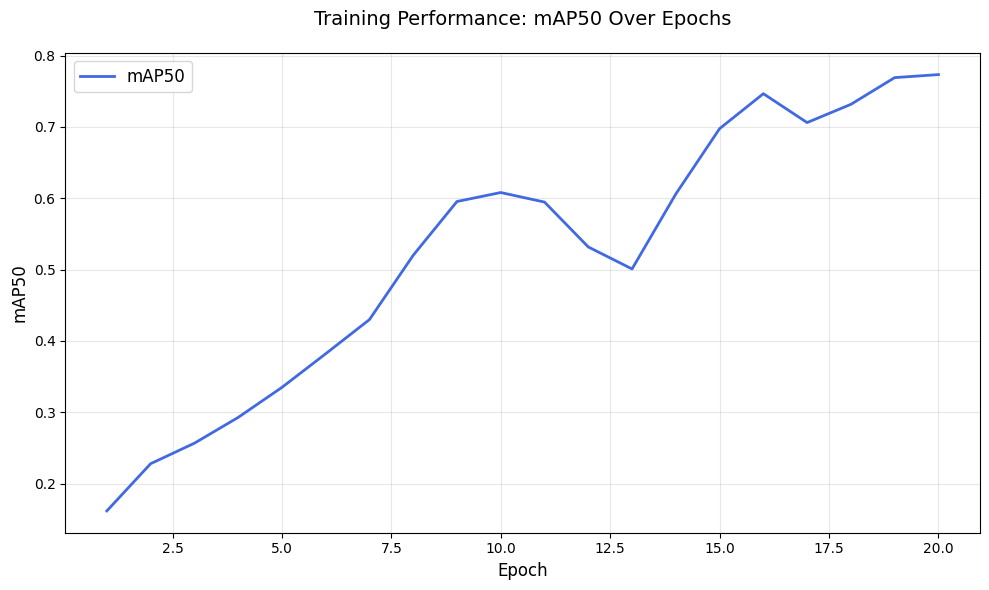

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training metrics
metrics_path = '/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/results.csv'

#if not works meansgive this path '/content/drive/MyDrive/Smart-Waste-AI/runs/detect/garbage_detection_colab/results.csv'
metrics = pd.read_csv(metrics_path)

# Create performance plot
plt.figure(figsize=(10, 6))
plt.plot(metrics['epoch'], metrics['metrics/mAP50(B)'],
         label='mAP50', linewidth=2, color='royalblue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP50', fontsize=12)
plt.title('Training Performance: mAP50 Over Epochs', fontsize=14, pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Image

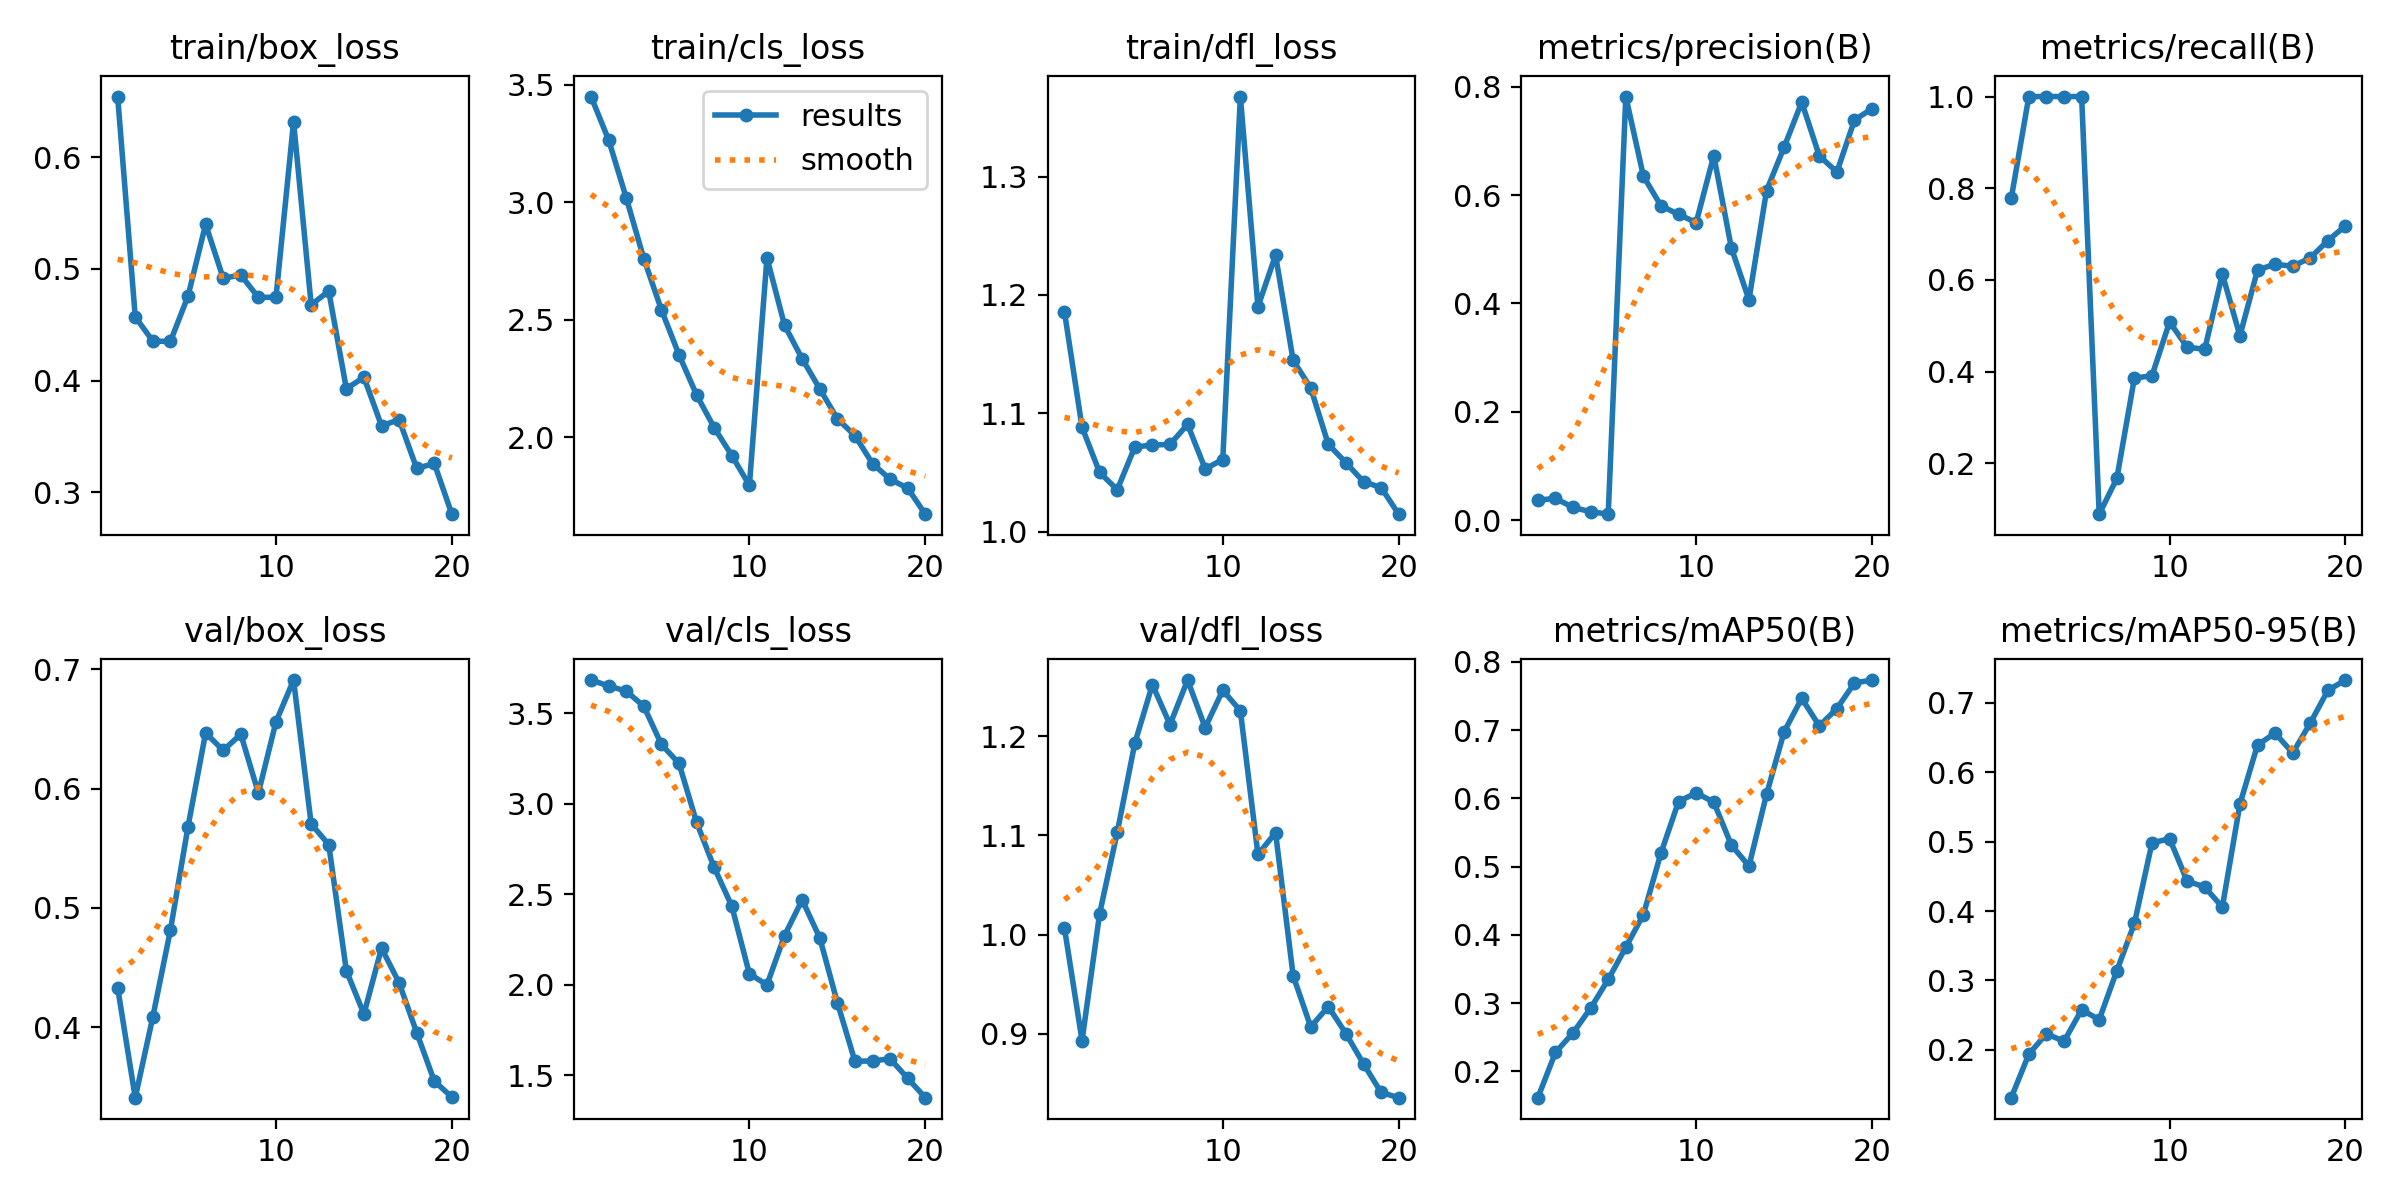

In [ ]:
Image("/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/results.png",width=600)

In [ ]:
import pandas as pd

# Path to your results.csv
results_path = "/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/results.csv"

# Load the CSV file
results_df = pd.read_csv(results_path)

# Extract the last epoch's metrics (assuming the last row is the best)
last_epoch = results_df.iloc[-1]

# Print key metrics
print("=== Model Performance Metrics ===")
print(f"mAP@0.5 (mean Average Precision): {last_epoch['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5:0.95: {last_epoch['metrics/mAP50-95(B)']:.3f}")
print(f"Precision: {last_epoch['metrics/precision(B)']:.3f}")
print(f"Recall: {last_epoch['metrics/recall(B)']:.3f}")
print(f"Box Loss: {last_epoch['train/box_loss']:.3f} (Lower = Better)")
print(f"Validation Box Loss: {last_epoch['val/box_loss']:.3f} (Lower = Better)")

=== Model Performance Metrics ===
mAP@0.5 (mean Average Precision): 0.773
mAP@0.5:0.95: 0.733
Precision: 0.760
Recall: 0.718
Box Loss: 0.281 (Lower = Better)
Validation Box Loss: 0.341 (Lower = Better)


**Verify the run folder exist**

In [ ]:
!ls -la "/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab"

total 5836
-rw------- 1 root root   1654 Jul 19 08:26 args.yaml
-rw------- 1 root root 253425 Jul 19 08:28 BoxF1_curve.png
-rw------- 1 root root 239386 Jul 19 08:28 BoxP_curve.png
-rw------- 1 root root 120264 Jul 19 08:28 BoxPR_curve.png
-rw------- 1 root root 201335 Jul 19 08:28 BoxR_curve.png
-rw------- 1 root root 196652 Jul 19 08:28 confusion_matrix_normalized.png
-rw------- 1 root root 153225 Jul 19 08:28 confusion_matrix.png
-rw------- 1 root root 179544 Jul 19 08:26 labels_correlogram.jpg
-rw------- 1 root root 174868 Jul 19 08:26 labels.jpg
-rw------- 1 root root   2560 Jul 19 08:28 results.csv
-rw------- 1 root root 308108 Jul 19 08:28 results.png
-rw------- 1 root root 530704 Jul 19 08:26 train_batch0.jpg
-rw------- 1 root root 398378 Jul 19 08:27 train_batch110.jpg
-rw------- 1 root root 349788 Jul 19 08:27 train_batch111.jpg
-rw------- 1 root root 363909 Jul 19 08:27 train_batch112.jpg
-rw------- 1 root root 375456 Jul 19 08:26 train_batch1.jpg
-rw------- 1 root root 4445

**8. Model Deployment for Inference**

      Run your trained garbage detection model on new images and videos

**1. Image Detection (Detect objects in single images).**


image 1/1 /content/drive/MyDrive/Garbage_detection_model/glass.jpg: 640x640 1 glass, 11.4ms
Speed: 3.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


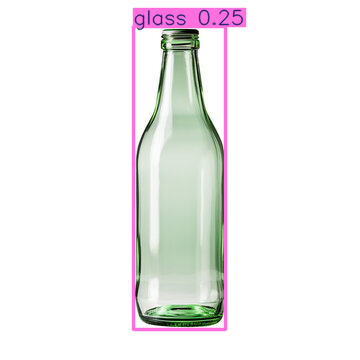

In [ ]:
from ultralytics import YOLO
model=YOLO("/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt")
results=model("/content/drive/MyDrive/Garbage_detection_model/glass.jpg", save=True)
results[0].show()

**2. Video Object Detection (YOLO Only)**

In [ ]:
from ultralytics import YOLO
import cv2

# Load YOLO model
model = YOLO("/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt")

# Video input path
video_path = "/content/drive/MyDrive/Smart-Waste-AI/test_video.mp4"  # Change to your video path
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video path
output_path = "/content/drive/MyDrive/Smart-Waste-AI/run/detect/video_detection_output(1).mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    # Draw bounding boxes on the frame
    detected_frame = results[0].plot()

    # Write the frame to output video
    out.write(detected_frame)

# Release resources
cap.release()
out.release()
#cv2.destroyAllWindows()

print(f"Detection video saved to: {output_path}")


0: 384x640 (no detections), 78.3ms
Speed: 1.8ms preprocess, 78.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.8ms
Speed: 1.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.4ms
Speed: 1.6ms preprocess, 19.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 20.3ms
Speed: 2.4ms preprocess, 20.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 13.3ms
Speed: 1.5ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 13.8ms
Speed: 1.6ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 1.7ms postprocess per image at

# **Finally object Detection was successfully executed..**

# **Next we perform object segmentation in real time video**

In [ ]:
for result in results:
  boxes=result.boxes
  print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5.], device='cuda:0')
conf: tensor([0.2523], device='cuda:0')
data: tensor([[1.3301e+02, 2.6208e+01, 2.2551e+02, 3.2953e+02, 2.5231e-01, 5.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (360, 360)
shape: torch.Size([1, 6])
xywh: tensor([[179.2649, 177.8682,  92.4999, 303.3206]], device='cuda:0')
xywhn: tensor([[0.4980, 0.4941, 0.2569, 0.8426]], device='cuda:0')
xyxy: tensor([[133.0149,  26.2079, 225.5148, 329.5285]], device='cuda:0')
xyxyn: tensor([[0.3695, 0.0728, 0.6264, 0.9154]], device='cuda:0')


**1. Image Segmentation  (YOLO + SAM)**

In [ ]:
from ultralytics import YOLO
from ultralytics import SAM


yolo_model= YOLO("/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt")
result=yolo_model("/content/drive/MyDrive/Smart-Waste-AI/glass.jpg")

sam_model=SAM("sam2_b.pt")
for result in results:
  class_ids= result.boxes.cls.int().tolist()
  if len(class_ids):
    boxes=result.boxes.xyxy
    sam_results=sam_model(result.orig_img,bboxes=boxes,verbose=False, save=True,device=0)


image 1/1 /content/drive/MyDrive/Smart-Waste-AI/glass.jpg: 640x640 1 glass, 13.6ms
Speed: 4.1ms preprocess, 13.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


**2. Video Segmentation (YOLO + SAM)**

In [ ]:
from ultralytics import YOLO, SAM
import cv2

# Load YOLO model
yolo_model = YOLO("/content/drive/MyDrive/Smart-Waste-AI/run/detect/garbage_detection_colab/weights/best.pt")

# Load SAM model
sam_model = SAM("sam_b.pt")

# Input video path
video_path = "/content/drive/MyDrive/Smart-Waste-AI/test_video.mp4"
cap = cv2.VideoCapture(video_path)

# Output video path
output_path = "/content/drive/MyDrive/Smart-Waste-AI/run/detect/video_segmentation_output(2).mp4"

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define VideoWriter
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    detect_results = yolo_model(frame)

    # Get bounding boxes
    boxes = detect_results[0].boxes.xyxy if detect_results[0].boxes else None

    if boxes is not None:
        # Run SAM segmentation on detected objects
        sam_results = sam_model(frame, bboxes=boxes, verbose=False)
        # Draw segmentation masks
        segmented_frame = sam_results[0].plot()
    else:
        segmented_frame = frame  # If no detections, keep original frame

    # Write the frame to output video
    out.write(segmented_frame)

# Release resources
cap.release()
out.release()
#cv2.destroyAllWindows()

print(f"Segmentation video saved to: {output_path}")


0: 384x640 (no detections), 20.5ms
Speed: 1.8ms preprocess, 20.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 13.8ms
Speed: 1.6ms preprocess, 13.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 16.7ms
Speed: 2.4ms preprocess, 16.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Metal, 16.0ms
Speed: 2.4ms preprocess, 16.0ms inference, 1.5ms postprocess per image at

# **Finally object segmentation was done successfully...**